In [123]:
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import PIL
import seaborn as sns

from os import listdir
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
from tqdm import tqdm
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

In [86]:
df=pd.DataFrame({"category":[], "images":[]})
df_test=pd.DataFrame({"category":[], "images":[]})
i=0
folder_dir = r"C:\Users\Asus\OneDrive\Desktop\Emotion_detection_with_CNN-main\data\train"
for images in os.listdir(folder_dir):
    for sub in os.listdir(folder_dir+"\\"+images):
        i=i+1
        df.loc[i]=[images]+[sub]
        
i=0
folder_dir = r"C:\Users\Asus\OneDrive\Desktop\Emotion_detection_with_CNN-main\data\test"
for images in os.listdir(folder_dir):
    for sub in os.listdir(folder_dir+"\\"+images):
        i=i+1
        df_test.loc[i]=[images]+[sub]

In [87]:
df.head()

,category,images
1,angry,Training_10118481.jpg
2,angry,Training_10120469.jpg
3,angry,Training_10131352.jpg
4,angry,Training_10161559.jpg
5,angry,Training_1021836.jpg


Total categories:  7

Categories:  ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


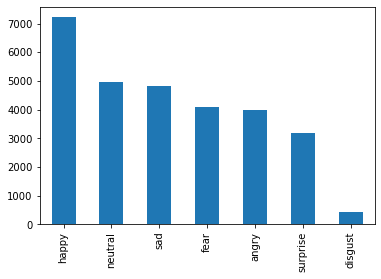

In [88]:
print("Total categories: ",len(df['category'].unique()))
print()
print("Categories: ",df['category'].unique())
df['category'].value_counts().plot(kind='bar')

In [89]:
data_dir = r"C:\Users\Asus\OneDrive\Desktop\Emotion_detection_with_CNN-main\data\train"
data_dir_test = r"C:\Users\Asus\OneDrive\Desktop\Emotion_detection_with_CNN-main\data\test"
image_h,image_w=48,48
classes = df['category'].unique()

In [90]:
image_names=df['images']
target_label=df['category']
image_names_test=df_test['images']
target_label_test=df_test['category']

In [91]:
X=[]
for img in tqdm(image_names):
  X.append(np.asarray((Image.open(data_dir+"\\"+img)).resize((image_h,image_w))))
X_test=[]
for img in tqdm(image_names_test):
      X_test.append(np.asarray((Image.open(data_dir_test+"\\"+img)).resize((image_h,image_w))))

100%|█████████████████████████████████████████████████████████████████████████████| 7178/7178 [00:09<00:00, 729.49it/s]


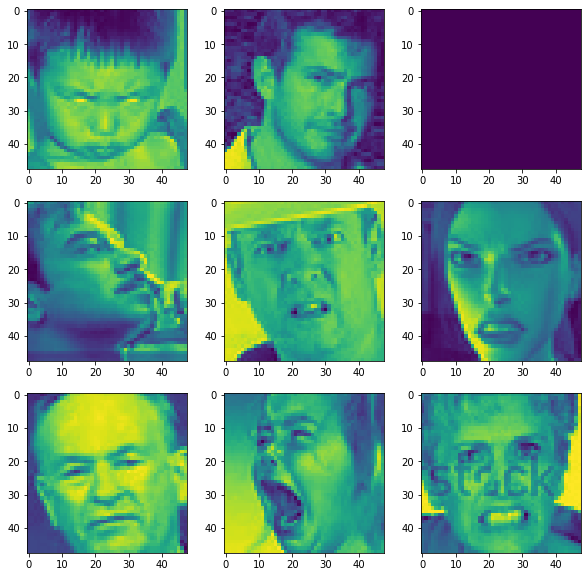

In [92]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X[i])

In [93]:
X=np.asarray(X)
X=X /255.0
X=np.reshape(X, (X.shape[0], -1))

X_test=np.asarray(X_test)
X_test=X_test /255.0
X_test=np.reshape(X_test, (X_test.shape[0], -1))

y=np.asarray(target_label)
y_test=np.asarray(target_label_test)

In [99]:
enc = LabelEncoder()
y=enc.fit_transform(y)

In [101]:
X.shape

(28709, 2304)

In [102]:
X, y =shuffle(X,y, random_state=42)

In [103]:
y_test=enc.transform(y_test)

In [104]:
liy=[]
lix=[]
acc=0
index=0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X, y)
    liy.append(neigh.score(X_test, y_test))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

KNeighborsClassifier()

In [105]:
knn=KNeighborsClassifier(n_neighbors=index+1)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [109]:
y_pred=knn.predict(X_test)

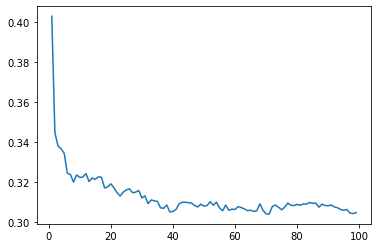

max acc at k=1 acc of 0.4028977431039287


In [107]:
plt.plot(lix, liy)
plt.show()
print("max acc at k="+str(index+1)+" acc of "+str(acc))

In [112]:
fpr = {}
tpr = {}
thresh ={}

n_class = 7
pred_prob=knn.predict_proba(X_test)

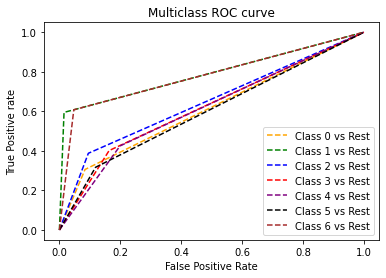

In [115]:
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Class 6 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.36      0.31      0.33       958
           1       0.38      0.59      0.46       111
           2       0.40      0.39      0.40      1024
           3       0.45      0.40      0.42      1774
           4       0.31      0.42      0.36      1233
           5       0.36      0.32      0.34      1247
           6       0.63      0.61      0.62       831

    accuracy                           0.40      7178
   macro avg       0.41      0.43      0.42      7178
weighted avg       0.41      0.40      0.40      7178



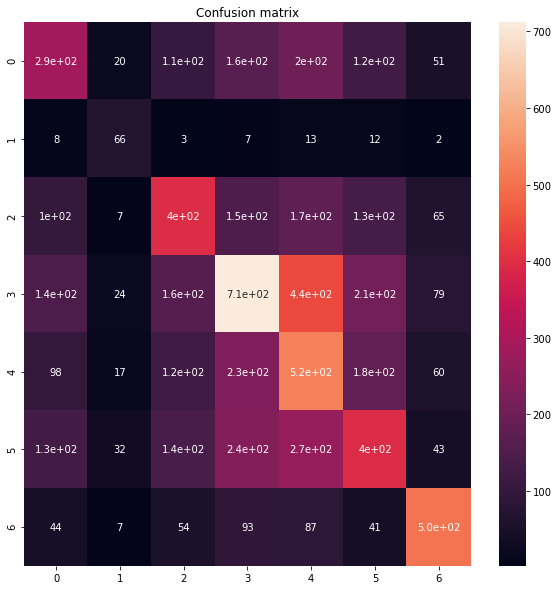

In [129]:
conf_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(conf_mat, annot=True)
plt.title("Confusion matrix")
plt.show()